ДОМАШНЯЯ РАБОТА № 2_3
Ходыка Анны

In [2]:
! pip install pandas

In [3]:
!pip3 install lxml

In [4]:
!python --version

Python 3.8.12


In [194]:
import numpy as np
import pandas as pd

Прочитайте csv файл (используйте функцию read_csv)

In [123]:
books=pd.read_csv('bestsellers with categories.csv')

Выведите первый пять строчек (используется функцию head)

In [124]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Выведите размеры датасета (используйте атрибут shape) 

In [125]:
books.shape

(550, 7)

Ответ: О скольки книгах хранит данные датасет? О 550 книгах.

In [127]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
books.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum)
Ответ: Есть ли в каких либо переменных пропуски? (Да/Нет) - НЕТ

In [128]:
books.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique)
Ответ: Какие есть уникальные жанры? - 2 жанра - 'Non Fiction', 'Fiction'

In [129]:
books['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist')

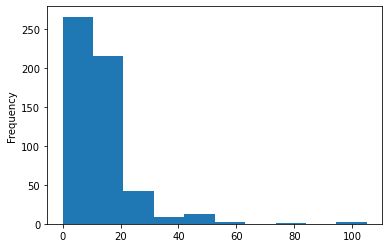

In [131]:
import matplotlib.pyplot as plt

books['price'].plot(kind='hist')
plt.show()

In [137]:
books['price'].describe()


count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

In [138]:
books['price'].median()

11.0

Ответ: Какой рейтинг в датасете наивысший? Ответ: 4.9

In [139]:
books['user_rating'].max()

4.9

Ответ: Сколько книг имеют такой рейтинг? Ответ: 28 книг, не учитывая дубли

In [148]:
books[books['user_rating']==4.9]['name'].drop_duplicates().count()

28

Ответ: У какой книги больше всего отзывов? Ответ: Where the Crawdads Sing	Delia Owens

In [154]:
books[books['reviews']==books['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Ответ: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ: Publication Manual of the American Psychologic...

In [163]:
max_price_2015 = books[books['year']==2015]['price'].max()
books[(books['year']==2015)&(books['price']==max_price_2015)]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Ответ: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ: 20 книг

In [168]:
books[(books['year']==2010)&(books['genre']=='Fiction')].shape

(20, 7)

Ответ: Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ: 1 книга

In [178]:
books[(books['user_rating']==4.9)&((books['year']==2010)|(books['year']==2011))]
#books[(books['user_rating']==4.9)&(books['year']==2011)]

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values).
Ответ: Какая книга последняя в отсортированном списке? Ответ: Old School (Diary of a Wimpy Kid #10)

In [188]:
books[(books['year']==2015)&(books['price']<8)].sort_values(by='price')[-1:]

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


Для начала давайте посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min). Не берите все столбцы, виберете только нужные вам

In [197]:
books.groupby(['genre'])[['price']].agg([np.min, np.max])

price     
             amin amax
genre                 
Fiction         0   82
Non Fiction     0  105

Ответ: Максимальная цена для жанра Fiction: Ответ - 82 доллара

Ответ: Минимальная цена для жанра Fiction: Ответ - 0 долларов

Ответ: Максимальная цена для жанра Non Fiction: Ответ - 105 долларов

Ответ: Минимальная цена для жанра Non Fiction: Ответ - 0 долларов

Теперь создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). Не берите все столбцы, виберете только нужные

In [201]:
autors_books=books.groupby(['author'])[['name']].count()
autors_books

,name
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Ответ: Какой размерности вышла таблица? Ответ: (248,1) то есть 248 авторов.

In [202]:
autors_books.shape

(248, 1)

Ответ: У какого автора больше всего книг? Ответ: Jeff Kinney

In [205]:
autors_books[autors_books['name']==autors_books['name'].max()]

,name
author,
Jeff Kinney,12


Ответ: Сколько книг у этого автора? Ответ: 12 книг

Теперь создайте второй датафрейм, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean). Не берите все столбцы, виберете только нужные

In [209]:
autors_rating=books.groupby(['author'])[['user_rating']].agg(np.mean)
autors_rating

,user_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


Ответ: У какого автора средний рейтинг минимальный? Ответ: Donna Tartt

In [213]:
autors_rating[autors_rating['user_rating']==autors_rating['user_rating'].min()]

,user_rating
author,
Donna Tartt,3.9


Ответ: Какой у этого автора средний рейтинг? Ответ: 3.9

Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную

In [216]:
autors_books_and_rating=pd.concat([autors_rating, autors_books], axis=1)
autors_books_and_rating

,user_rating,name
author,,
Abraham Verghese,4.600000,2
Adam Gasiewski,4.400000,1
Adam Mansbach,4.800000,1
Adir Levy,4.800000,1
Admiral William H. McRaven,4.700000,1
...,...,...
Walter Isaacson,4.566667,3
William Davis,4.400000,2
William P. Young,4.600000,2


Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу (используйте функцию sort_values)
Ответ: Какой автор первый в списке? Muriel Barbery

In [217]:
autors_books_and_rating.sort_values(by=['name', 'user_rating'], ascending=[True, True])

,user_rating,name
author,,
Muriel Barbery,4.000000,1
Chris Cleave,4.100000,1
Ian K. Smith M.D.,4.100000,1
Pierre Dukan,4.100000,1
Elizabeth Strout,4.200000,1
...,...,...
American Psychological Association,4.500000,10
Suzanne Collins,4.663636,11
Gary Chapman,4.736364,11
